# SciPy for Scientific Computing

In this notebook, we'll explore how to use SciPy — a powerful library for scientific computing, statistics, and data analysis in Python.

## What is SciPy?
SciPy (Scientific Python) builds on NumPy and provides tools for:
 - Curve fitting (e.g. enzyme kinetics)
 - Statistical tests (e.g. comparing treatment groups)
 - Signal processing (e.g. filtering absorbance data)
 - Optimization (e.g. minimizing cost functions)

# Let's get started!




In [1]:
import numpy as np
from scipy import stats, integrate, optimize
import scipy.stats as stats   # For statistical tests
import scipy.optimize as opt # For curve fitting
import matplotlib.pyplot as plt  # For plotting

%matplotlib inline

## Example 1: Solving Equations

In [2]:
from scipy.optimize import fsolve

def equation(x):
    return x**2 - 4

root = fsolve(equation, x0=2)
print("Root:", root)

Root: [2.]


## Example 2: Integration

In [3]:
from scipy.integrate import quad

result, error = quad(lambda x: x**2, 0, 1)
print("Integral result:", result)

Integral result: 0.33333333333333337


## Example 3: Interpolation

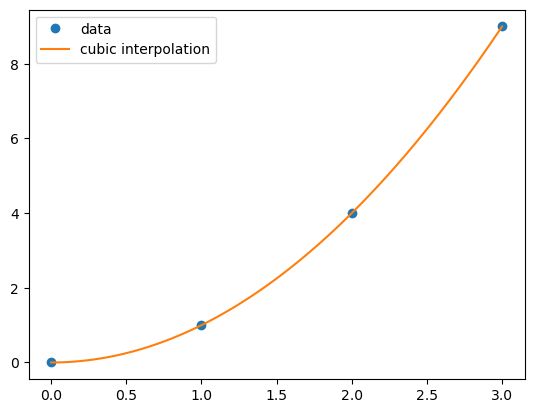

In [4]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt

x = np.array([0, 1, 2, 3])
y = np.array([0, 1, 4, 9])

f = interp1d(x, y, kind='cubic')
x_new = np.linspace(0, 3, 100)
y_new = f(x_new)

plt.plot(x, y, 'o', label='data')
plt.plot(x_new, y_new, '-', label='cubic interpolation')
plt.legend()
plt.show()

## Example 4: Statistical Tests

In [5]:
data = np.random.normal(loc=0, scale=1, size=1000)

# Perform a t-test
t_stat, p_value = stats.ttest_1samp(data, popmean=0)
print("T-statistic:", t_stat)
print("P-value:", p_value)

T-statistic: -0.5948144983949888
P-value: 0.5521021698351766


## Example 5: t-test — Compare Two Sample Groups
Let's say you're comparing protein concentration in two cell treatments.

In [6]:
# Simulate protein concentrations (in µg/mL)
control = [1.2, 1.3, 1.5, 1.4, 1.6]
treated = [1.8, 1.9, 2.1, 1.7, 2.0]

# Perform a two-sample t-test
t_stat, p_value = stats.ttest_ind(control, treated)

print("t-statistic:", t_stat)
print("p-value:", p_value)


t-statistic: -4.999999999999998
p-value: 0.001052825793366541


## Example 6: Curve Fitting (Enzyme Kinetics)
We'll use SciPy to fit the Michaelis-Menten equation to simulated enzyme data.

Estimated Vmax: 0.8399593718658945
Estimated Km: 1.4204547608083617


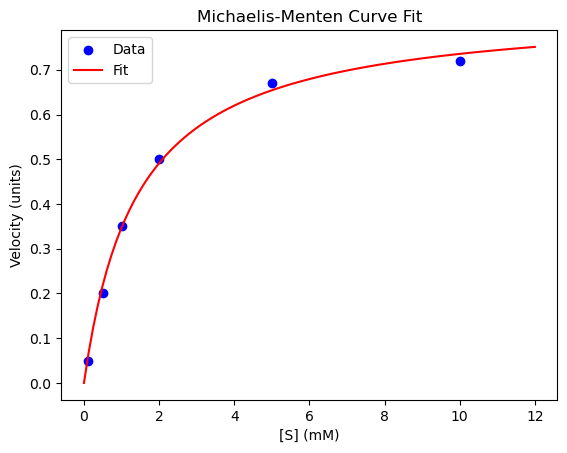

In [7]:
# Substrate concentrations [S] (mM)
substrate = np.array([0.1, 0.5, 1, 2, 5, 10])
# Measured reaction rates (v)
velocity = np.array([0.05, 0.20, 0.35, 0.50, 0.67, 0.72])

# Define the Michaelis-Menten function
def michaelis_menten(S, Vmax, Km):
    return (Vmax * S) / (Km + S)

# Use curve_fit to estimate Vmax and Km
params, _ = opt.curve_fit(michaelis_menten, substrate, velocity)

Vmax_est, Km_est = params
print("Estimated Vmax:", Vmax_est)
print("Estimated Km:", Km_est)

# Plot the fit
S_fit = np.linspace(0, 12, 100)
v_fit = michaelis_menten(S_fit, Vmax_est, Km_est)

plt.scatter(substrate, velocity, label='Data', color='blue')
plt.plot(S_fit, v_fit, label='Fit', color='red')
plt.xlabel('[S] (mM)')
plt.ylabel('Velocity (units)')
plt.title('Michaelis-Menten Curve Fit')
plt.legend()
plt.show()


## Example 7: Correlation Between Two Variables
Suppose you measured protein expression and RNA expression across samples:

In [8]:
protein = [2.1, 2.4, 2.5, 2.8, 3.0]
rna =     [1.9, 2.2, 2.4, 2.7, 3.1]

# Pearson correlation
corr, p = stats.pearsonr(protein, rna)

print("Correlation coefficient (r):", corr)
print("p-value:", p)


Correlation coefficient (r): 0.991591235137846
p-value: 0.0009244504317239711


## Example 8: ANOVA (Compare More Than Two Groups)
You have 3 drug treatments and want to know if they differ in enzyme activity.

In [9]:
# Simulate activity levels
drug_A = [5.1, 5.3, 5.0, 5.2]
drug_B = [6.0, 6.2, 6.1, 6.3]
drug_C = [4.8, 4.9, 4.7, 5.0]

# One-way ANOVA test
f_stat, p_value = stats.f_oneway(drug_A, drug_B, drug_C)

print("F-statistic:", f_stat)
print("p-value:", p_value)


F-statistic: 111.20000000000006
p-value: 4.5129050551885145e-07


## Practice Challenge

Use `scipy.optimize` to find the minimum of the function $f(x) = x^2 + 2x + 1$.

In [10]:
from scipy.optimize import minimize

def f(x):
    return x**2 + 2*x + 1

result = minimize(f, x0=0)
print("Minimum at:", result.x)

Minimum at: [-1.00000001]


## Summary

- `scipy.optimize` → root finding, minimization
- `scipy.integrate` → definite integrals
- `scipy.interpolate` → interpolation
- `scipy.stats` → distributions and hypothesis testing

> SciPy is ideal for scientific research, modelling, and data analysis when paired with NumPy and Matplotlib.